<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-and-Submitting-Data" data-toc-modified-id="Downloading-and-Submitting-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading and Submitting Data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Understanding-the-data" data-toc-modified-id="Understanding-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data</a></span></li><li><span><a href="#Data-preparation-and-machine-learning" data-toc-modified-id="Data-preparation-and-machine-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation and machine learning</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

Here's a simple getting started notebook that shows you how to load the data, and how to create a Kaggle submission file. Remember that you should structure your notebook after the 8 step guide, as detailed in the [Assignment 1 instructions](https://hvl.instructure.com/courses/9086/assignments/17277). 

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system

# Downloading and Submitting Data

## Setup

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

## Data

Go to Kaggle competition website and download the data. Make a new folder in your DAT158ML repository called 'data'. Store the Kaggle competition data in this folder

Then you should uncomment the code and run the following two cells. **Warning:** This doesn't work in this Kaggle hosted notebook! See below

In [2]:
#lists the files in the folder
import os
print(os.listdir("data"))

['housing_data.csv', 'housing_test_data.csv', 'sample_submission.csv']


In [3]:
#Reads in the csv-files and creates a dataframe using pandas

housing = pd.read_csv('data/housing_data.csv')
final_test = pd.read_csv('data/housing_test_data.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')


**Kaggle-specific way of accessing the data**

On Kaggle the data is stored in the folder `../input/dat158-2019/`:

In [4]:
#train = pd.read_csv('../input/dat158-2020/housing_data.csv')
#test = pd.read_csv('../input/dat158-2020/housing_test_data.csv')
#sampleSubmission = pd.read_csv('../input/dat158-2020/sample_submission.csv')

# Understanding the data

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
final_test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [8]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


# Data preparation and machine learning

This part you should code and figure out yourself. Play around with different ways to prepare the data, different machine learning models and settings of hyperparameters

Remember to create your own validation set to evaluate your models. Your test set will not contain labels and are therefore not suited for evaluating and tuning your different models. 


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
features = housing.columns
print(f"Features: {features}")

Features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


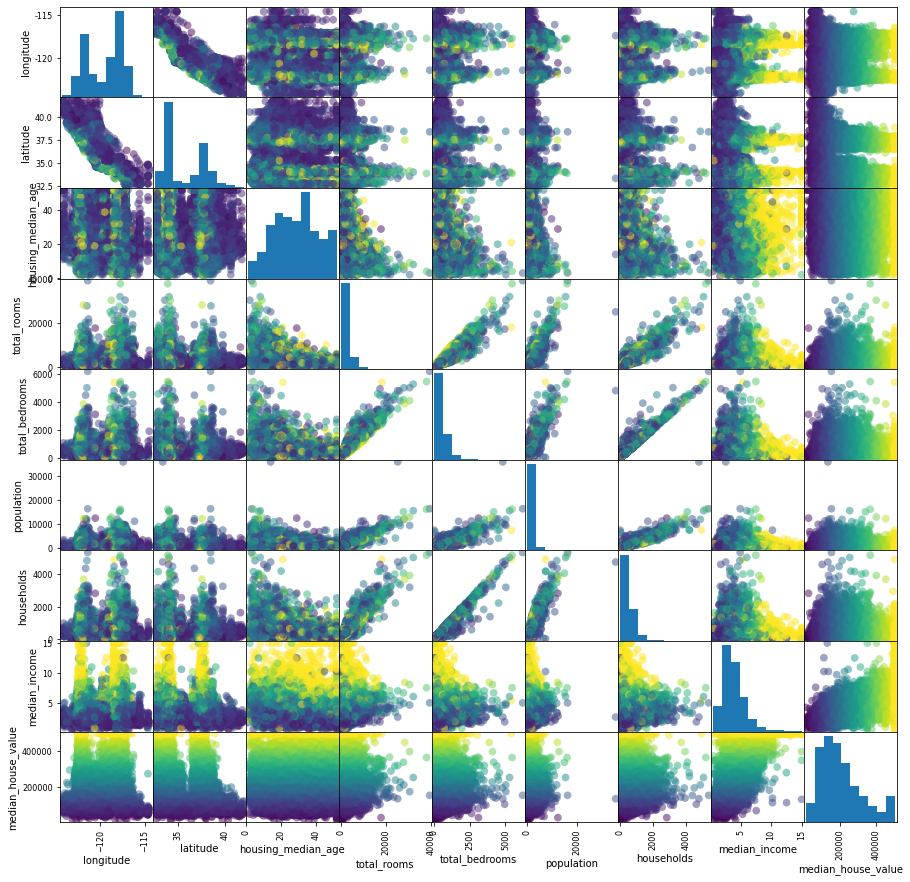

In [12]:
#pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
housing_dropna = housing.dropna()
pd.plotting.scatter_matrix(housing_dropna[features], c=housing_dropna['median_house_value'], figsize=(15,15), marker='o', s=60)
plt.show()

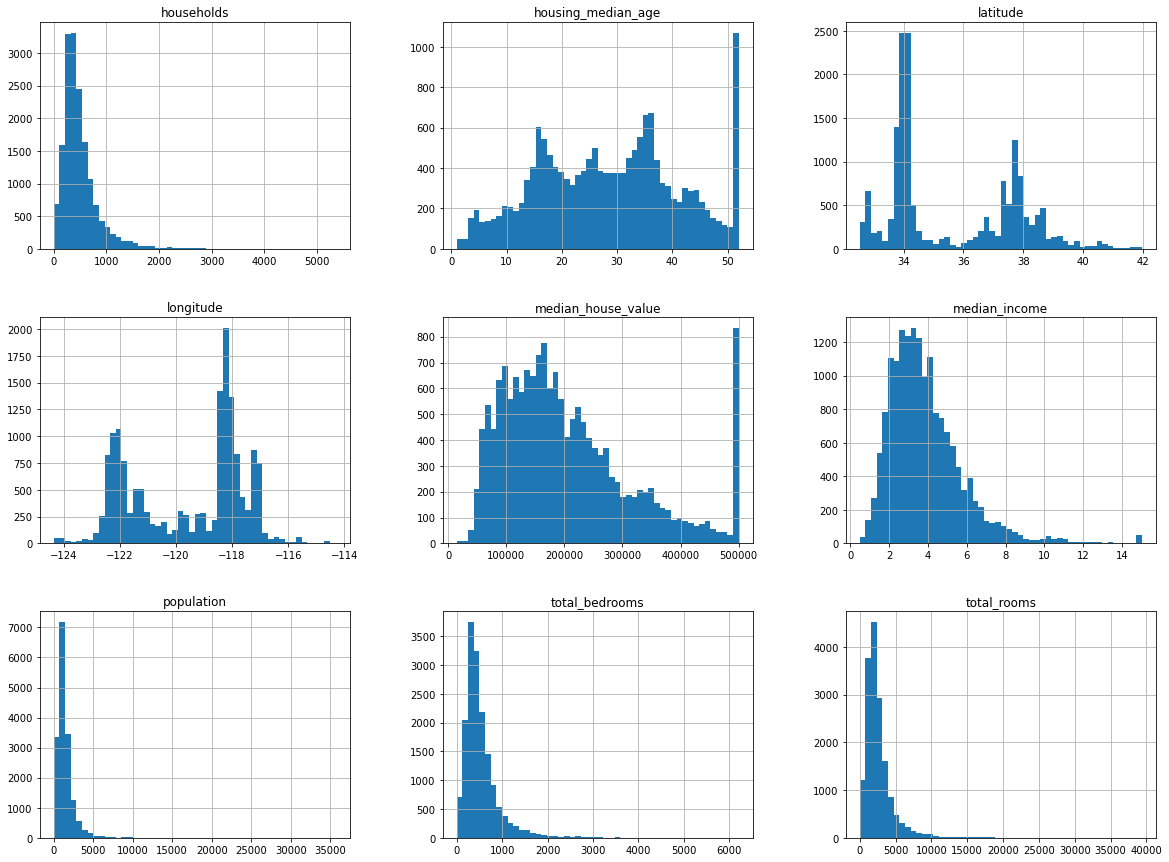

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Behandle ikke komplett data


In [14]:
#Hvilken data er ikke komplett?
print(housing.isna().any())
print(final_test.isna().any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool
Id                    False
longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool


In [15]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# this imputer imputes with the mean
imputer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

# this imputer imputes with an arbitrary value
imputer_categoric = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='constant', fill_value='Missing'))])

preprocessor = ColumnTransformer(transformers=[
        ('imputer_numeric', imputer_numeric, ['total_bedrooms']),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

longitude              False
latitude               False
housing_median_age     False
total_rooms            False
total_bedrooms          True
population             False
households             False
median_income          False
median_house_value     False
ocean_proximity        False
missing_bedroominfo    False
dtype: bool
longitude              False
latitude               False
housing_median_age     False
total_rooms            False
total_bedrooms          True
population             False
households             False
median_income          False
median_house_value     False
ocean_proximity        False
missing_bedroominfo    False
dtype: bool


ValueError: Expected 2D array, got 1D array instead:
array=[ 318.   63.  331. ... 1011.   11.  780.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
'''
from sklearn.impute import SimpleImputer

#import math
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

housingSITrain = housing.copy()

housingSITrain['missing_bedroominfo'] = np.where(np.isnan(housingSITrain['total_bedrooms']), True, False)
print(housingSITrain.isna().any())

mapping = {
    'ISLAND':0, 'NEAR BAY':1,  '<1H OCEAN':2, 'NEAR OCEAN':3, 'INLAND':4,
}

housingSITrain['ocean_proximity'] = housingSITrain['ocean_proximity'].map(lambda x : mapping[x])

print(housingSITrain.isna().any())


#housingSITrain = ordinal_encoder.fit_transform(housingSITrain)



imp = imp.fit(housingSITrain['total_bedrooms'])
housingSITrain['total_bedrooms'] = imp.transform(housingSITrain['total_bedrooms'])
print(housingSITrain.isna().any())

def treatData (df):
    df['missing_bedroominfo'] = np.where(np.isnan(df['total_bedrooms']), True, False)
    df['ocean_proximity'] = df['ocean_proximity'].map(lambda x : mapping[x])
    df['total_bedrooms'] = imp.transform(df['total_bedrooms'])
'''

''

In [ ]:
housingTreated = treatData(housing)

In [ ]:
housingTreated.head

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100,max_depth=10,min_samples_split=3,n_jobs=1)#n_jobs=1 pga memmory exception

In [ ]:
# Dropping incomplete  row entries 
housing.head
housing = housing.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
print(train_set.head)


test_set.head

In [ ]:
trainx = train_set[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
trainy = train_set['median_house_value']



In [ ]:
def doTrain(_rf,_trainx, train_y):
    return _rf.fit(_trainx,train_y)

rf = doTrain(rf,trainx,trainy)

In [ ]:
test_set.head

In [ ]:

testx = test_set[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
testy = test_set['median_house_value']

y_pred = rf.predict(testx)



from sklearn.metrics import accuracy_score
accuracy_score(testy,y_pred)

# Submission

In [ ]:
final_test_trimmed = final_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].replace([np.inf, -np.inf], np.nan).dropna()


median_house_value = rf.predict(final_test_trimmed)

After you have trained your model and have found predictions on your test data, you must create a csv-file that contains 'Id' and your predictions in two coloums

We have assumed that you have called your predicitons 'median_house_value' after you have trained your model

This is just for demonstrational purposes, that is why all our predictions is zero. Yours will be filled with numbers


In [ ]:
#median_house_value = [0 for i in test['Id']]

In [ ]:
len(median_house_value)

In [ ]:
median_house_value[:10]

In [ ]:
submission = pd.DataFrame({'Id': test['Id'], 'median_house_value': median_house_value})

In [ ]:
submission.head()

In [ ]:
# Stores a csv file to submit to the kaggle competition
#submission.to_csv('submission.csv', index=False)